<a href="https://colab.research.google.com/github/KaranbeerSinghSandhu/KaranbeerSinghSandhu/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

from   sklearn.impute import SimpleImputer

In [ ]:
zomato_df = pd.read_csv("/content/zomato.csv")

zomato_df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


#Dropping 2 extra columns

In [ ]:


zomato_df.drop(axis=1 , columns=['Unnamed: 0.1'	, 'Unnamed: 0'] , inplace= True)

zomato_df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [ ]:
zomato_df.shape


(7105, 10)

In [ ]:
zomato_df.size

71050

In [ ]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        7105 non-null   object 
 1   restaurant type        7105 non-null   object 
 2   rate (out of 5)        7037 non-null   float64
 3   num of ratings         7105 non-null   int64  
 4   avg cost (two people)  7048 non-null   float64
 5   online_order           7105 non-null   object 
 6   table booking          7105 non-null   object 
 7   cuisines type          7105 non-null   object 
 8   area                   7105 non-null   object 
 9   local address          7105 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 555.2+ KB


In [ ]:
zomato_null = zomato_df.isnull().sum()

zomato_null


restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64

In [ ]:
zomato_df.describe()

,rate (out of 5),num of ratings,avg cost (two people)
count,7037.000000,7105.000000,7048.000000
mean,3.514253,188.921042,540.286464
std,0.463249,592.171049,462.902305
min,1.800000,1.000000,40.000000
25%,3.200000,16.000000,300.000000
50%,3.500000,40.000000,400.000000
75%,3.800000,128.000000,600.000000
max,4.900000,16345.000000,6000.000000


## Missing Value in Percentage

In [ ]:
missed_data = zomato_df.isnull().sum().to_frame().rename(columns= {0:'Missed Value'})


missed_data['Percentage of Missed value'] = round((zomato_df.isnull().sum()*100)/len(zomato_df),2)


missed_data

,Missed Value,Percentage of Missed value
restaurant name,0,0.00
restaurant type,0,0.00
rate (out of 5),68,0.96
num of ratings,0,0.00
avg cost (two people),57,0.80
online_order,0,0.00
table booking,0,0.00
cuisines type,0,0.00
area,0,0.00
local address,0,0.00


## instead dropping NA values we will use Mean to fill these values SimpleImputer


In [ ]:

imputer = SimpleImputer(strategy='mean')

zomato_df[['rate (out of 5)', 'avg cost (two people)']] = imputer.fit_transform(zomato_df[['rate (out of 5)', 'avg cost (two people)']])

zomato_df.isnull().sum().to_frame().rename(columns = {0:'Missed value'})




,Missed value
restaurant name,0
restaurant type,0
rate (out of 5),0
num of ratings,0
avg cost (two people),0
online_order,0
table booking,0
cuisines type,0
area,0
local address,0


In [ ]:
zomato_df.isnull().sum()

restaurant name          0
restaurant type          0
rate (out of 5)          0
num of ratings           0
avg cost (two people)    0
online_order             0
table booking            0
cuisines type            0
area                     0
local address            0
dtype: int64

##Duplicates values in Data

In [ ]:


zomato_df.duplicated().sum()

0

## Top Ten restaurent with their branches

In [ ]:


top_ten = zomato_df['restaurant type'].value_counts()[:10]
top_ten

Quick Bites           2840
Casual Dining         1634
Cafe                   403
Delivery               358
Takeaway, Delivery     289
Dessert Parlor         217
Bakery                 154
Casual Dining, Bar     123
Beverage Shop          118
Bar                     82
Name: restaurant type, dtype: int64


#Distribution on the basis of "Restaurant type"

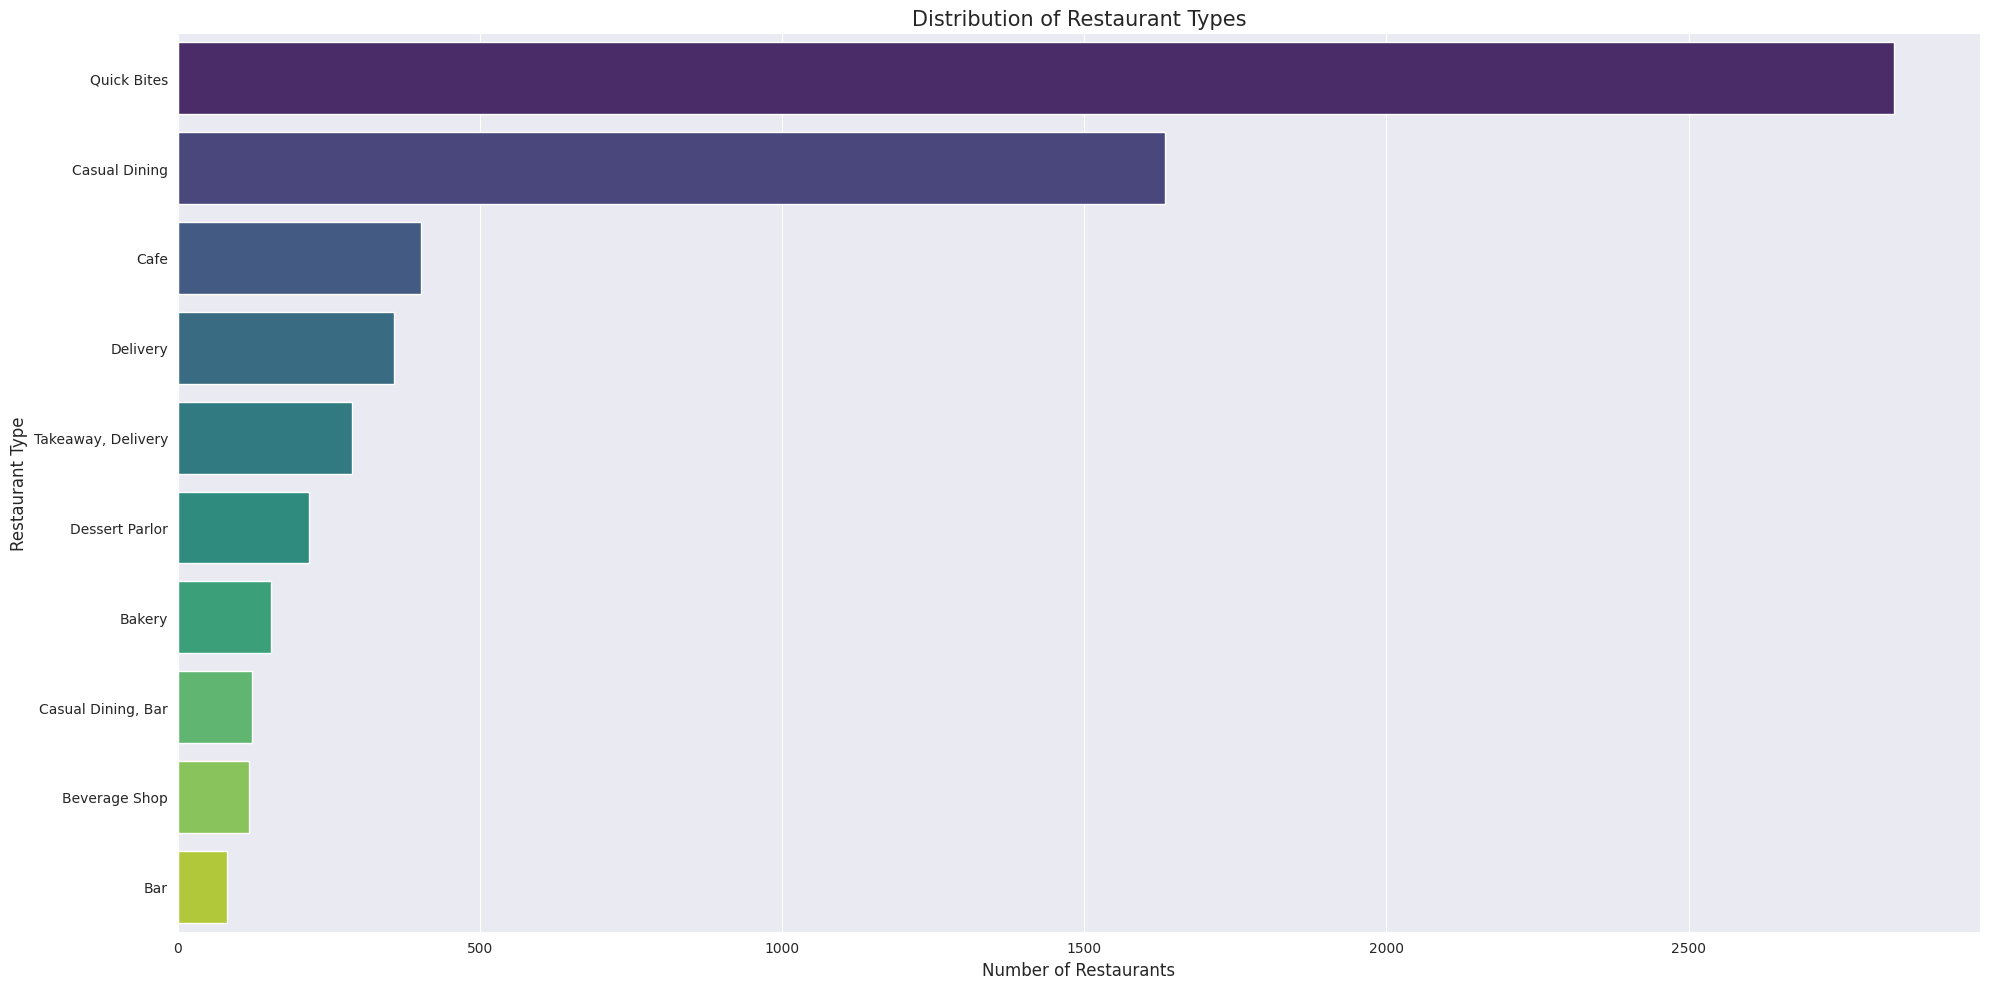

In [ ]:
# Setting style for seaborn plots
sns.set_style("darkgrid")

plt.figure(figsize=(20, 10))

sns.barplot(y=top_ten.index, x=top_ten.values, palette="viridis", hue = top_ten.index, legend = False)
plt.title('Distribution of Restaurant Types', fontsize=15)
plt.xlabel('Number of Restaurants', size=12)
plt.ylabel('Restaurant Type', size=12)
plt.tight_layout()
plt.show()



#Observations
 as we can observe "Quick Bites" is the most common type of restaurant, followed by "Casual Dining".Bar restaurants have the fewest number of restaurants.

#Conclusion
  This indicates that there is a significant presence of restaurants that offer quick and convenient dining options, as well as those that provide a more relaxed dining experience.We need to improve this types of restaurent services in the areas where there is less demand of Beverages and Bars.

#Distribution of restaurants with and without "online_order" capability

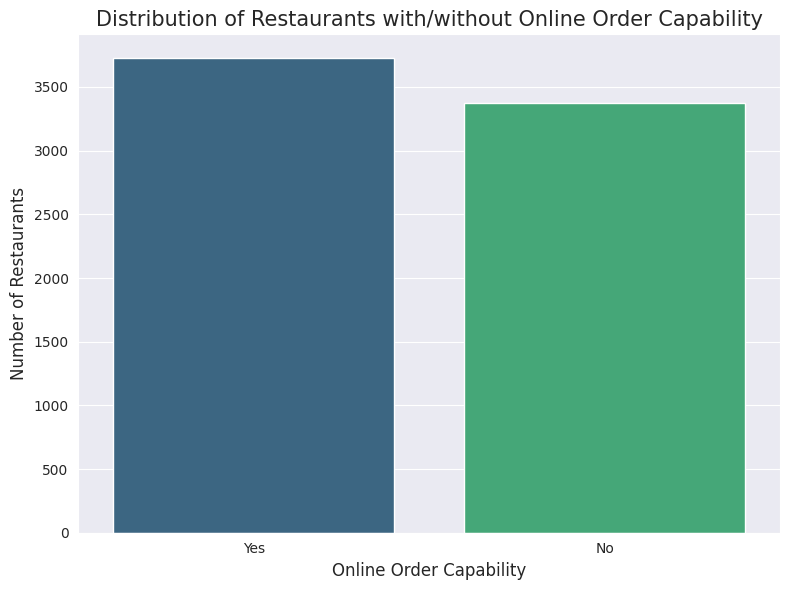

In [ ]:


plt.figure(figsize=(8, 6))

online_order_count = zomato_df['online_order'].value_counts()
sns.barplot(x=online_order_count.index, y=online_order_count.values, palette="viridis", legend = False, hue = online_order_count.index )
plt.title('Distribution of Restaurants with/without Online Order Capability', fontsize=15)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xlabel('Online Order Capability', fontsize=12)
plt.tight_layout()
plt.show()


#Observations
 #Most of the restaurants offer online ordering capabilities.Still, a noticeable number of restaurants do not offer online ordering.

#Conclusion
  Enhancing Service Quality: We aim to elevate our service quality by identifying and focusing on the most sought-after restaurant types offering online ordering. This strategic move is designed to ensure a superior and more convenient dining experience for our valued customers.

  Partnering with Excellence: We recognize the significance of collaborating with high-rated restaurants to further enhance our service offerings. This collaboration not only benefits our customers but also supports the growth and success of our partner restaurants.

  Business Expansion: As part of our growth strategy, we are committed to expanding our online restaurant service. This expansion will enable us to reach a broader customer base while aligning with evolving consumer preferences in the digital age.


#Distribution of restaurants with and without "table booking" capability

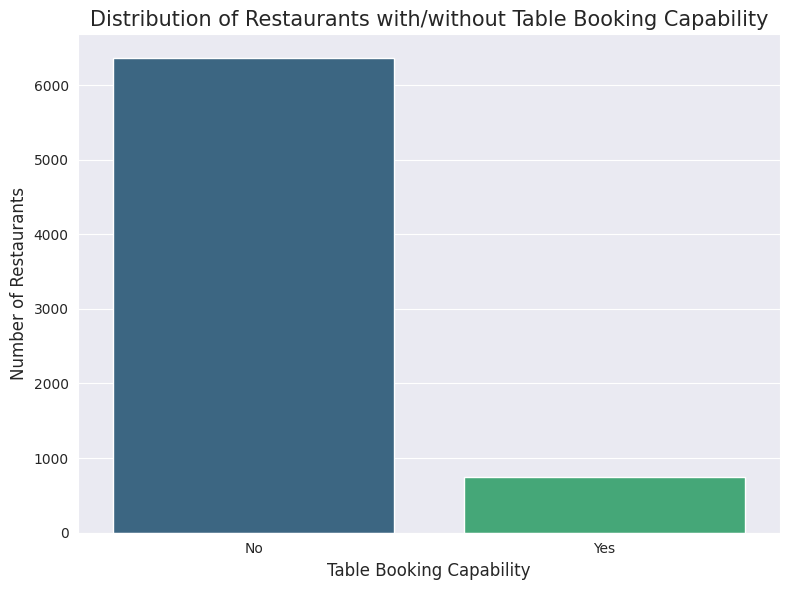

In [ ]:


plt.figure(figsize=(8, 6))

table_booking_count = zomato_df['table booking'].value_counts()
sns.barplot(x=table_booking_count.index, y=table_booking_count.values, palette="viridis", hue = table_booking_count.index, legend = False)
plt.title('Distribution of Restaurants with/without Table Booking Capability', fontsize=15)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xlabel('Table Booking Capability', fontsize=12)
plt.tight_layout()
plt.show()


#Observations
 #It can be observed that most restaurants do not offer table booking capabilities.Very few restaurants offer the option to book tables in advance.

#Conlusion
  Preference for Walk-In Dining: This observation suggests that many restaurants in the dataset prioritize walk-in customers over reservation-based bookings. This may align with the casual and spontaneous dining preferences of their clientele.

#Distribution of Rating "rate (out of 5)"

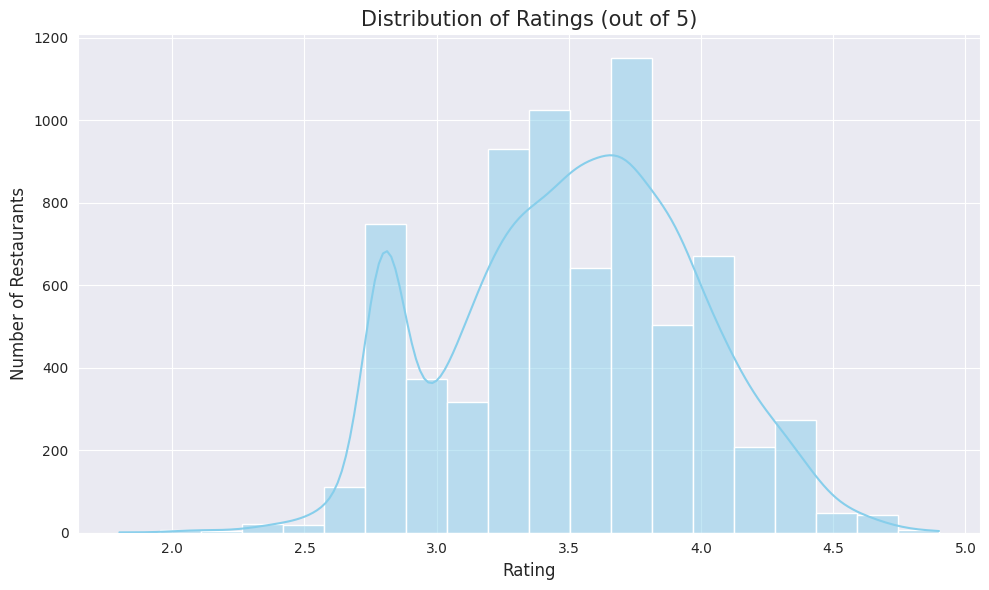

In [ ]:

plt.figure(figsize=(10, 6))

sns.histplot(zomato_df['rate (out of 5)'], bins=20, kde=True, color="skyblue", )
plt.title('Distribution of Ratings (out of 5)', fontsize=15)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()


#Observations
 #Ratings typically fall within the range of 4 to 5. There is a concentration of ratings between 3.5 and 4.0, indicating that the majority of restaurants have received moderately good ratings. Few outliers exist, with some restaurants receiving exceptionally low (below 2.5) or exceptionally high (5.0) ratings.

#Concluion
  Elevating High-Rated Restaurants: We will focus on restaurants that consistently receive high ratings, specifically those with ratings above 4. These establishments exemplify excellence in customer satisfaction. Our aim is to further enhance our services in these restaurant types, optimizing the online ordering experience and ensuring seamless service delivery.

  Improving Low-Rated Restaurants: Simultaneously, we will engage in a comparative analysis of low-rated restaurants. By juxtaposing their attributes and practices with those of high-rated counterparts, we can identify areas for improvement. Our goal is to elevate the quality of service, address shortcomings, and ultimately provide an enhanced dining experience for all customers.

#Aavg cost (two people)"

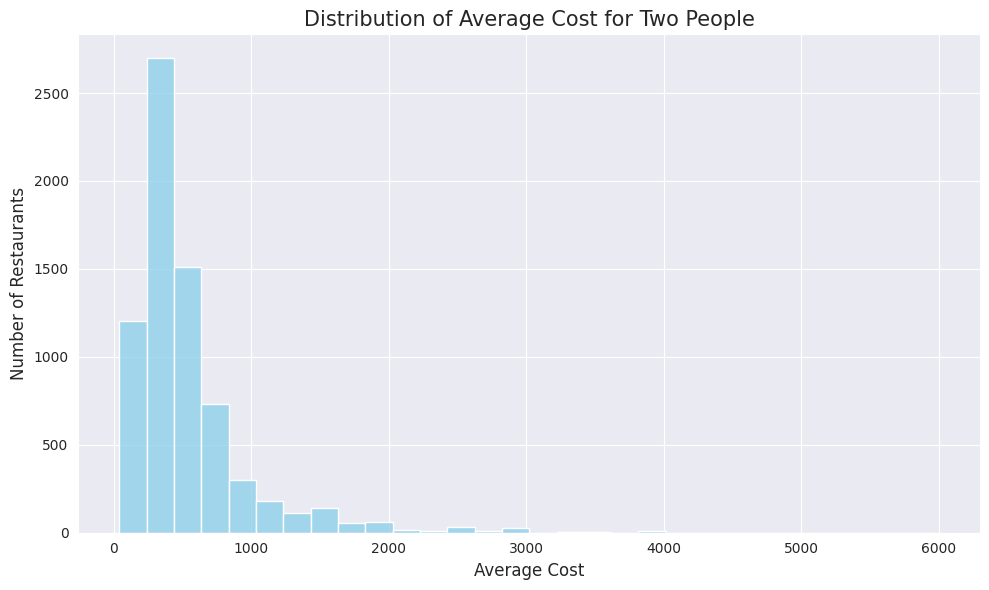

In [ ]:


plt.figure(figsize=(10, 6))

sns.histplot(zomato_df['avg cost (two people)'], bins=30, color="skyblue")
plt.title('Distribution of Average Cost for Two People', fontsize=15)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xlabel('Average Cost', fontsize=12)
plt.tight_layout()
plt.show()


#Observations
 #The average cost for two people falls predominantly within the range of approximately 100 to 600 units. A prominent peak occurs in the 200 to 300 range, indicating that many restaurants offer meals for two at this price point. Some restaurants, however, stand out as premium dining options due to their significantly higher average cost.

#Conclusion
  
  Expanding Mid-Range Options: We are committed to expanding our network of restaurants that fall within the average cost range of 100 to 600 units for two people. This strategic move aims to cater to a broad spectrum of customers, ensuring accessibility and affordability of dining experiences in every city we serve.

  Curating Premium Dining Experiences: Concurrently, we recognize the appeal of premium dining establishments with average costs above 1000 units for two people. To meet the preferences of discerning customers who seek elevated dining experiences, we will collaborate with these esteemed restaurants. Our objective is to provide our valued patrons with exclusive access to such culinary gems, offering a curated selection of premium options.

  Personalized Customer Engagement: We are dedicated to tailoring our services to align with the unique preferences of our customers. By understanding their spending patterns and dining aspirations, we will efficiently share details of restaurants with average costs above 1000 units, ensuring that those who seek exceptional dining experiences receive personalized recommendations and access to these upscale venues.

# Distribution of top cuisines

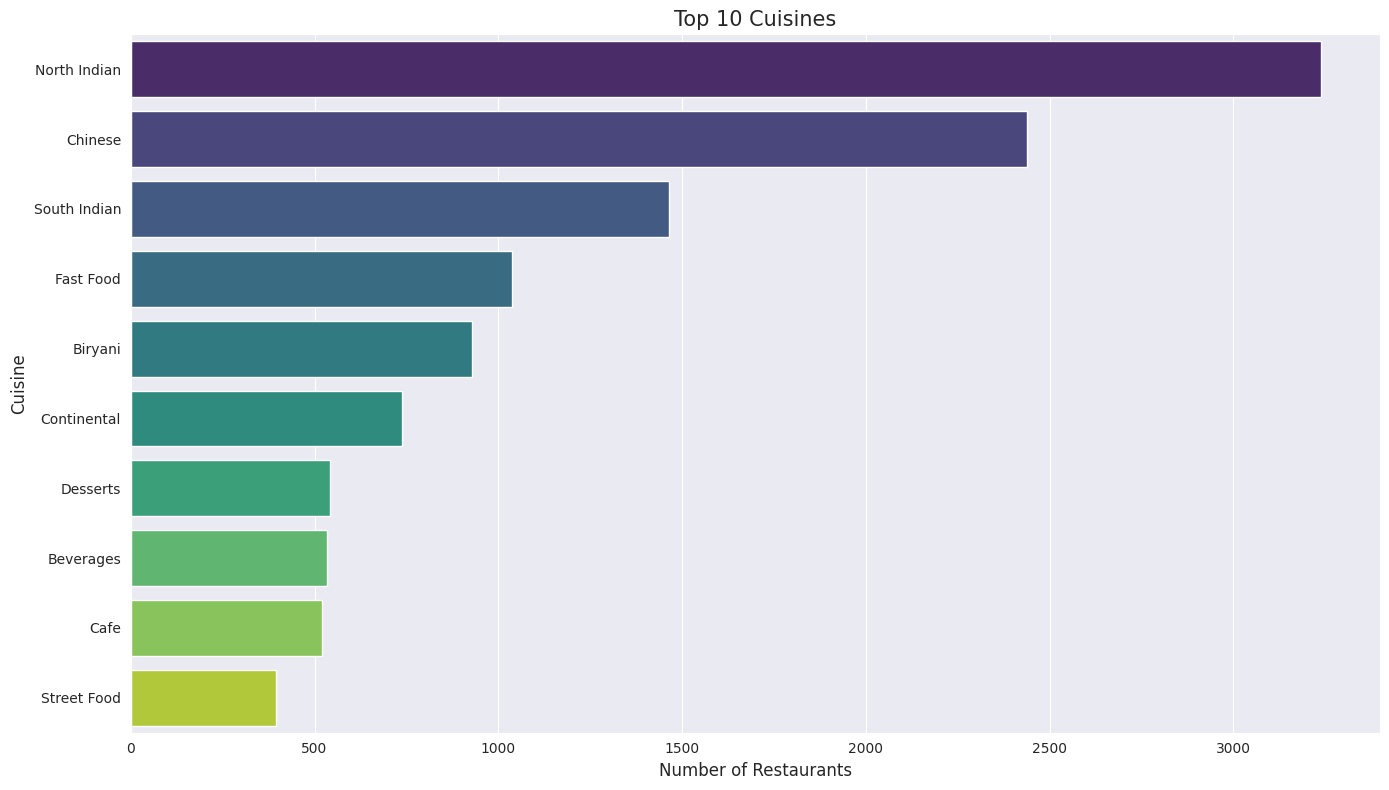

In [ ]:

plt.figure(figsize=(14, 8))

cuisines = zomato_df['cuisines type'].str.split(',').explode().str.strip()
top_cuisines = cuisines.value_counts().head(10)

sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette="viridis", hue = top_cuisines.index, legend = False)
plt.title('Top 10 Cuisines', fontsize=15)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.tight_layout()
plt.show()





#Observations
 #North Indian" cuisine is the most popular and is served in the highest number of restaurants.
 #Chinese" and "Fast Food" are also quite popular, coming in second and fourth respectively.
 #The other cuisines in the top 10 list also have a significant presence in the dataset.

#Conlusion

  Meeting Customer Demand: North Indian and Chinese cuisines have emerged as the most sought-after dining choices among our customers. By focusing on these culinary categories, we ensure that our offerings align with prevalent preferences, meeting the needs of a diverse customer base.

  Excellence in Execution: Our commitment to delivering excellence in North Indian and Chinese cuisine is reflected in our efforts to collaborate with top-rated restaurants and culinary experts. By forging these partnerships, we can provide our customers with exceptional dining experiences that exceed their expectations.



# Grouping by average cost and calculating the mean rating for each cost

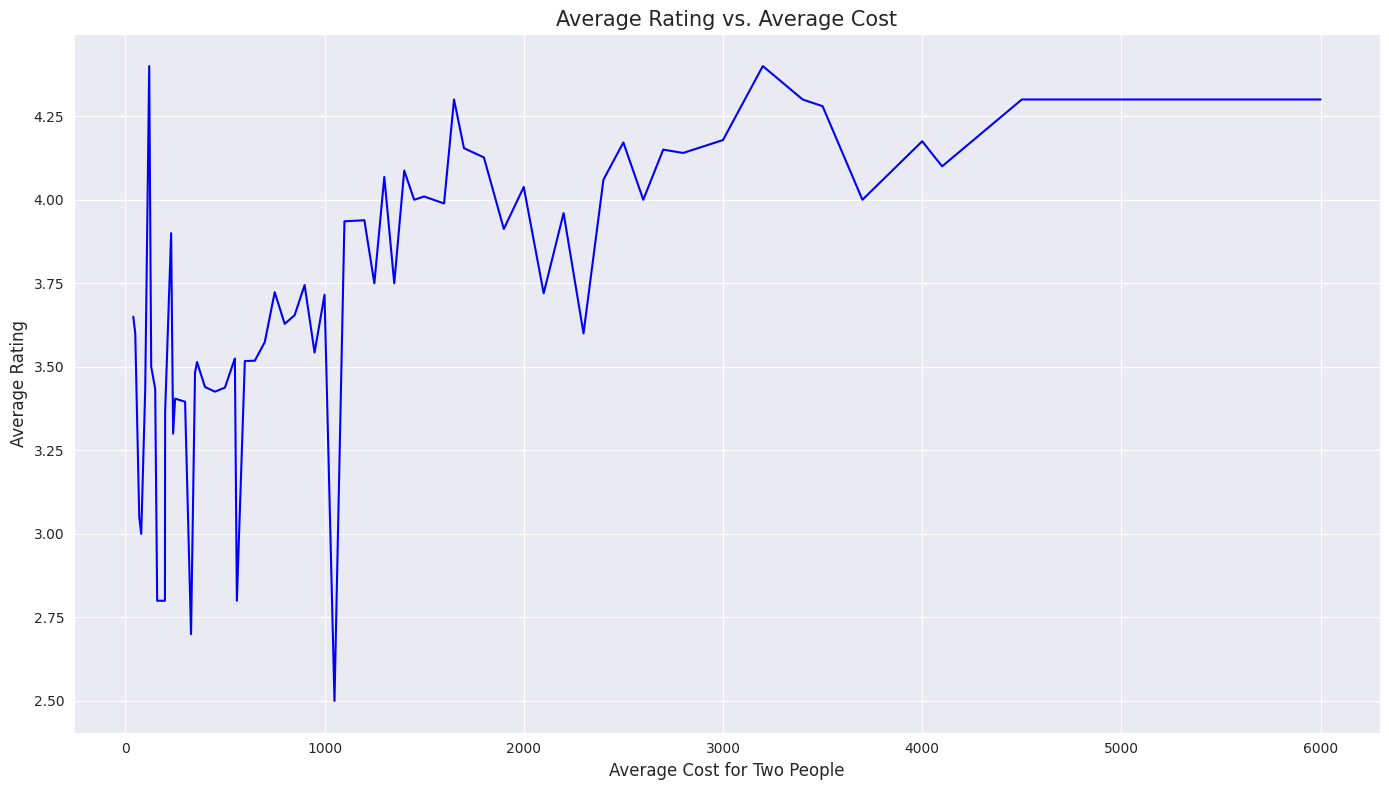

In [ ]:
# Line chart for average rating vs. average cost
plt.figure(figsize=(14, 8))

avg_cost_rating = zomato_df.groupby('avg cost (two people)')['rate (out of 5)'].mean().reset_index()

sns.lineplot(x=avg_cost_rating['avg cost (two people)'], y=avg_cost_rating['rate (out of 5)'], color="blue")
plt.title('Average Rating vs. Average Cost', fontsize=15)
plt.ylabel('Average Rating', fontsize=12)
plt.xlabel('Average Cost for Two People', fontsize=12)
plt.tight_layout()
plt.show()





#Observations
  There seems to be a general trend where restaurants with a higher average cost tend to have slightly higher ratings.
  However, this correlation isn't very strong as there are several fluctuations across different cost ranges.

#Conclusion
  Identifying Opportunities: Our strategy involves the identification of restaurants with lower ratings, particularly those with average costs below 1000 units. We will carefully analyze these establishments, assessing their cuisines, service quality, and customer feedback.

  Leveraging Success Factors: By leveraging the success factors of higher-rated restaurants, we aim to enhance the dining experiences of lower-rated establishments. This includes implementing best practices, optimizing menu offerings, and refining service delivery to elevate ratings and overall customer satisfaction.

# Bar chart for top 10 restaurants by number of ratings

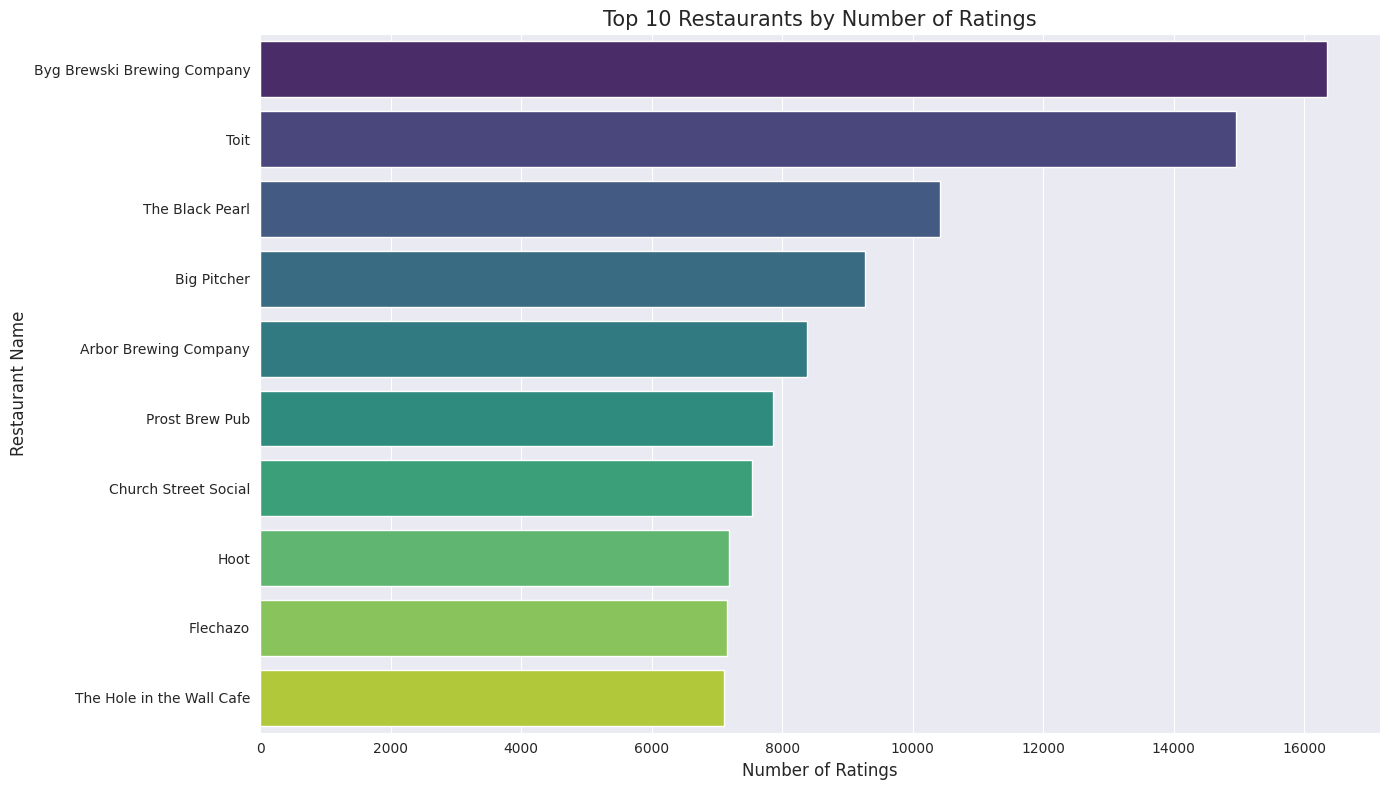

In [ ]:

plt.figure(figsize=(14, 8))


top_restaurants_ratings = zomato_df.groupby('restaurant name')['num of ratings'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_restaurants_ratings.index, x=top_restaurants_ratings.values, palette="viridis", hue = top_restaurants_ratings.index, legend = False)
plt.title('Top 10 Restaurants by Number of Ratings', fontsize=15)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.tight_layout()
plt.show()


#Observations

The top restaurant by number of ratings significantly leads in terms of reviews, indicating its popularity or widespread presence.
There is a noticeable difference between the first restaurant and the subsequent ones in terms of the number of ratings.

#Conlusion
  Service Enhancement: We recognize the value of top-rated restaurants and their commitment to exceptional service. By studying their best practices, we aim to enhance our service quality, ensuring that every interaction with our customers is marked by efficiency, professionalism, and a dedication to their satisfaction.

  Culinary Excellence: The cuisines and menus offered by top-rated restaurants serve as benchmarks for culinary excellence. We are committed to refining our offerings, diversifying our menu choices, and introducing innovative dishes that captivate the palates of our customers.

  Strategic Location: Location is pivotal in providing accessibility and convenience to our customers. We will strategically evaluate our restaurant locations, seeking to optimize our presence in areas that resonate with our target audience, ensuring accessibility and ease of dining.

  Digital Convenience: In the digital age, online ordering and table booking capabilities are indispensable. Drawing inspiration from top-rated restaurants, we will streamline our online ordering process and further develop our table booking system, making it more user-friendly and efficient.


# Top 5 restaurant types by average rating

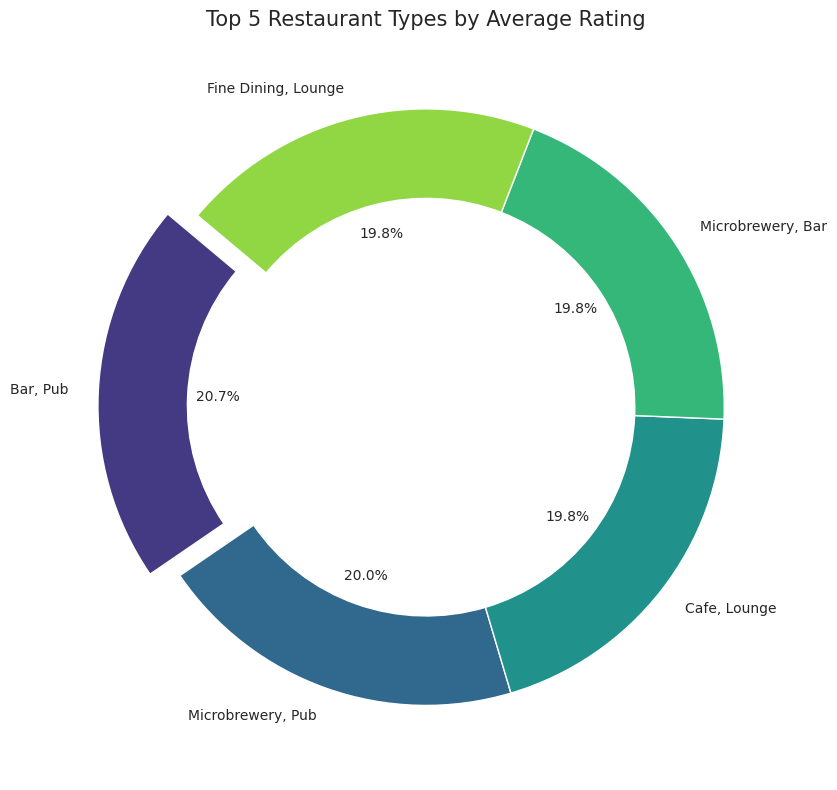

In [ ]:

plt.figure(figsize=(12, 8))

restaurant_type_avg_rating = zomato_df.groupby('restaurant type')['rate (out of 5)'].mean().sort_values(ascending=False).head(5)
colors = sns.color_palette("viridis", len(restaurant_type_avg_rating))
explode = [0.1] + [0] * (len(restaurant_type_avg_rating) - 1)  # Explode the first slice for better visibility
plt.pie(restaurant_type_avg_rating, labels=restaurant_type_avg_rating.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Top 5 Restaurant Types by Average Rating', fontsize=15)
plt.tight_layout()
plt.show()




#Observations

The restaurant type with the highest average rating constitutes a significant portion of the top-rated types.
There isn't a vast difference in the average ratings among the top 5 restaurant types, indicating a close competition in terms of quality or user perception.

#Conclusion
  Understanding the Bar and Pub Experience: Bar and Pub-type restaurants offer a unique atmosphere and social experience. We will invest in understanding the nuances of these establishments, including ambiance, drink offerings, entertainment, and customer expectations.

  Optimizing Bar Services: A key aspect of Bar and Pub-type restaurants is the bar itself. We will work to optimize bar services, ensuring a wide selection of beverages, skilled bartenders, and a vibrant atmosphere that encourages social interaction.

  Promoting Entertainment: Bars and Pubs often offer entertainment options such as live music or sports screenings. We will explore opportunities to enhance the entertainment value of these restaurants, providing an enjoyable and lively environment for our customers.

#Top 10 cuisines by average rating

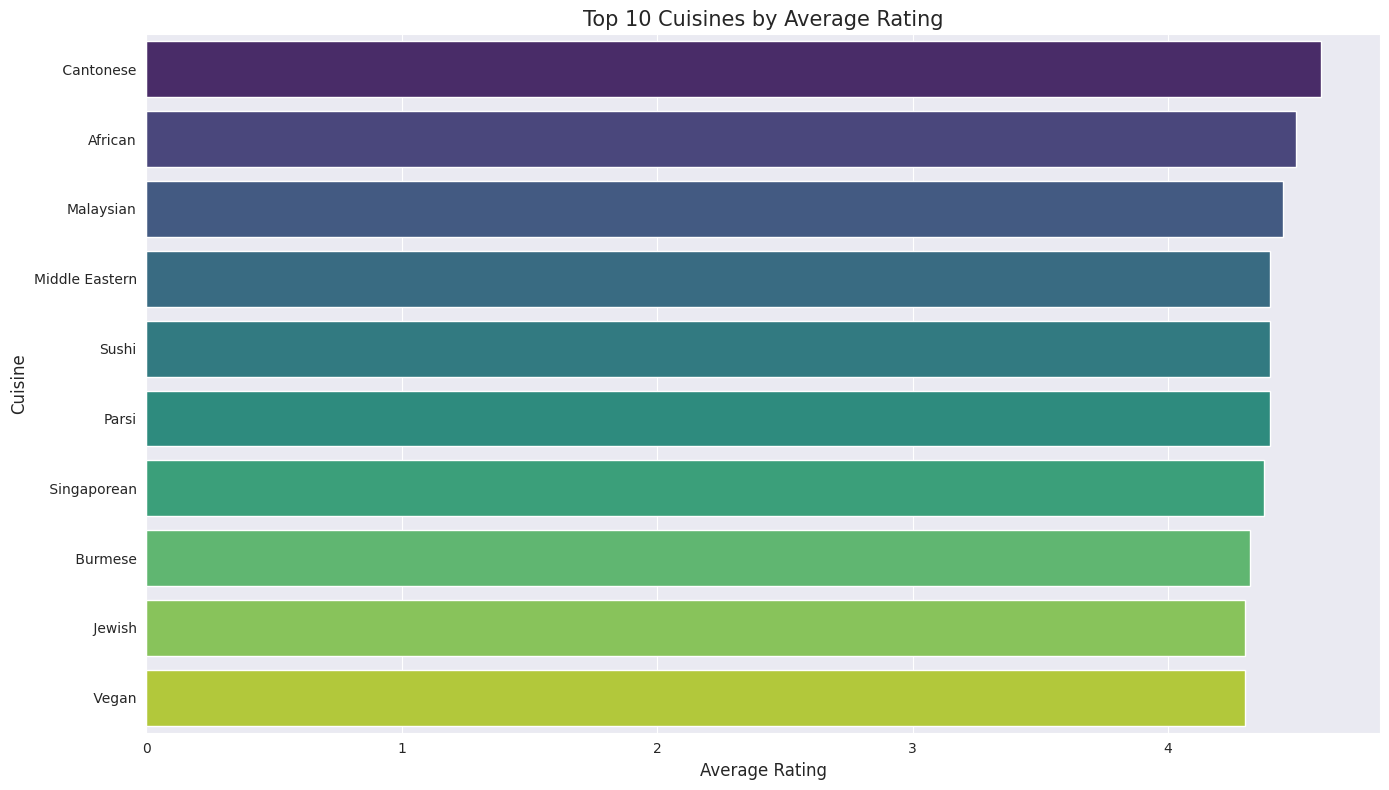

In [ ]:

plt.figure(figsize=(14, 8))

# Splitting and aggregating the 'cuisines' column to compute average ratings for individual cuisines
cuisines_ratings = zomato_df.assign(cuisines=zomato_df['cuisines type'].str.split(',')).explode('cuisines')
cuisines_avg_rating = cuisines_ratings.groupby('cuisines')['rate (out of 5)'].mean().sort_values(ascending=False).head(10)

sns.barplot(y=cuisines_avg_rating.index, x=cuisines_avg_rating.values, palette="viridis", hue =  cuisines_avg_rating.index, legend = False )
plt.title('Top 10 Cuisines by Average Rating', fontsize=15)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.tight_layout()
plt.show()



#Observations

The top-rated cuisines seem to be diverse, ranging from regional dishes to international ones.
Some cuisines, which might be less common or specialized, have managed to achieve high average ratings, possibly indicating their niche appeal or quality.

#Conclusion
  Identifying Cuisine Gaps: We recognize the popularity of top-rated cuisines and their impact on overall restaurant ratings. To meet customer preferences comprehensively, we will identify restaurants that do not currently offer these cuisines.

  Strategic Additions: Our strategy involves the addition of premium dining options featuring these sought-after cuisines. By collaborating with renowned culinary experts and esteemed restaurants, we aim to introduce a curated selection of these cuisines as part of our premium dining offerings.

  Market Responsiveness: Our strategy is founded on being responsive to customer demand. By offering premium dining choices featuring top-rated cuisines, we anticipate a positive response from customers seeking exceptional culinary experiences.


In [ ]:
# The End